In [3]:
from KC_methods import methods, datasets, calc_KC76
import pandas as pd
import numpy as np
from logistic_maps import generate_logistic, SAMPLES,logistic_map, to_bin, discretize
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
def calc_SB(probability_values,complexities):
     df = pd.DataFrame({"y":probability_values,'x':complexities})
     groupmax = df.groupby('x').max().reset_index()
     return np.polyfit(groupmax['x'],np.log10(groupmax['y']),1);

In [5]:
n_iterations = 25
start_iteration=50
epsilon = 0.0
e_frequency = 0.0
r =-1

In [6]:
# for n_iterations in [5,20,25,50,100,150,200]:
n_iterations = 25

[50, 0.0, 0.0, -1]
[50, 0.0, 0.0, -1]
[50, 0.0, 0.0, -1]
[50, 0.0, 0.0, -1]


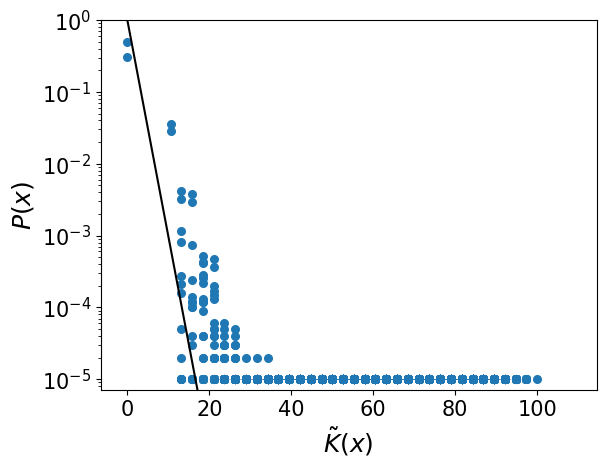

In [7]:
# %matplotlib widget
for n_iterations in [5,25,50,100]:
    patterns = generate_logistic(n_iterations,start_iteration=start_iteration,epsilon=epsilon,e_frequency=e_frequency,r=-1)
    probability = Counter(patterns)
    probability = {k: v/SAMPLES for k,v in probability.items()}
    probability_values =  list(probability.values())
    # method = calc_KC76
    complexities = list(map(calc_KC76,probability.keys()))
    K = np.array(complexities)
    K_scaled = n_iterations * ( K-min(K) ) / ( max(K)-min(K) )

    K_scaled = np.round(K_scaled,2)
    slope, intercept = calc_SB(probability_values,complexities)
    plt.clf()
    # plt.gca().set_aspect('equal')
    plt.semilogy(K_scaled,probability_values,'o',ms=5, markeredgewidth=1.5)
    plt.xlabel(r'$\tilde{K}(x)$',fontsize=18)
    plt.ylabel(r'$P(x)$',fontsize=18)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    x = np.arange(-1,n_iterations+10,1)
    k = 1/np.float_power(2,x)

    # plt.plot(x,y,c="k",label='fit')
    plt.plot(x,k,c='k',label=r"$2^{-k}$")
    plt.ylim((min(probability_values)/1.4,1))
    # plt.xlim([-1.1,n_iterations+1])
    # plt.plot(x,y_k-offset,c='green',label=r"$2^{-k}$")
    # plt.legend(loc="upper right")
    # plt.title(f"start={start_iteration}, eps={epsilon}, e_freq={e_frequency}, r={'random' if r == -1 else r}, KC_method={method}")
    # plt.xlabel(r'$\mathit{\tilde{K}_{%s}(x)}$' % method,fontsize=15)
    # plt.ylim([0.5*1/SAMPLES,1])
    # plt.show()
    plt.savefig(f"results/ttt/{n_iterations}.jpg",bbox_inches = "tight")
    row = [ start_iteration,epsilon,e_frequency,r]
    print(row)